In [1]:
 # 读入数据
import pandas as pd
MasterFile = pd.read_csv('./FoodScore.csv')
print(MasterFile.shape)
MasterFile[:5]

(196, 2)


,ID,score
0,pic1,2.750333
1,pic2,2.962092
2,pic3,3.459351
3,pic4,2.246845
4,pic5,2.609172


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa95351cb90>]],
      dtype=object)

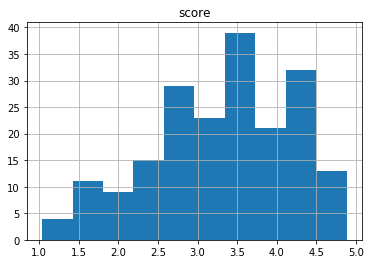

In [3]:
# 直方图
MasterFile.hist()

In [4]:
# 分离因变量
import numpy as np
FileNames = MasterFile['ID']
N = len(FileNames)
Y = np.array(MasterFile['score']).reshape([N, 1])

In [5]:
# 处理图像数据
from PIL import Image
IMSIZE = 128
X = np.zeros([N, IMSIZE, IMSIZE, 3])
for i in range(N):
    MyFile = FileNames[i]
    Im = Image.open('./data_foodscore/'+MyFile+'.jpg')
    Im = Im.resize([IMSIZE, IMSIZE])
    Im = np.array(Im) / 255
    X[i, ] = Im

/Users/helenology/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 432x288 with 0 Axes>

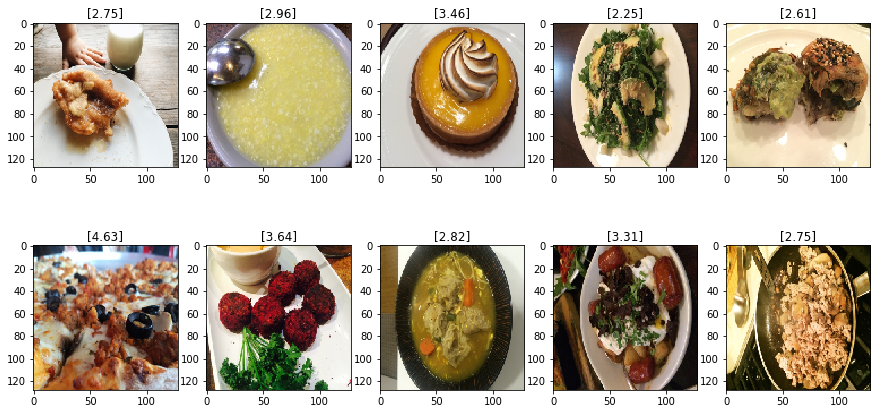

In [6]:
# 展示前10张图像
import matplotlib.pyplot as plt
plt.figure()
fig, ax = plt.subplots(2, 5)
fig.set_figheight(7.5)
fig.set_figwidth(15)
ax = ax.flatten() # 拉直变量ax，为了一层循环遍历所有变量
for i in range(10):
    ax[i].imshow(X[i,...])
    ax[i].set_title(np.round(Y[i], 2))

In [9]:
# 切分训练集和测试集
from sklearn.model_selection import train_test_split
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.5, random_state=0)

In [12]:
# 线性模型的构建
from keras.layers import Dense, Flatten, Input
from keras import Model
# 定义输入层
input_layer = Input([IMSIZE, IMSIZE, 3])
x = input_layer
# 拉直为长向量，为后面的全连接层作准备
x = Flatten()(x) # 第一个括号是空的，因为普通线性回归不需要其他额外的定义
# 全连接层
x = Dense(1)(x) # 1表示输出为一个标量
output_layer = x
model = Model(input_layer, output_layer)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 49153     
Total params: 49,153
Trainable params: 49,153
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 训练模型，使用keras的编译 Compile
from keras.optimizers import Adam
model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mse'])

In [15]:
# 模型拟合
model.fit(X0, Y0,
         validation_data=[X1, Y1],
         batch_size=100,
         epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 125ms/step - loss: 6.7824 - mse: 6.7824 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 500.3209 - mse: 500.3209 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 34ms/step - loss: 34.9245 - mse: 34.9245 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 39ms/step - loss: 112.1006 - mse: 112.1006 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 37ms/step - loss: 282.4708 - mse: 282.4708 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 190.8672 - mse: 190.8672 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 43ms/step - loss: 38.5528 - mse: 38.5528 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 8/100
1

1/1 [==============================] - 0s 28ms/step - loss: 0.6560 - mse: 0.6560 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 60/100
1/1 [==============================] - 0s 31ms/step - loss: 0.7465 - mse: 0.7465 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 61/100
1/1 [==============================] - 0s 25ms/step - loss: 1.2557 - mse: 1.2557 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 62/100
1/1 [==============================] - 0s 27ms/step - loss: 1.2947 - mse: 1.2947 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 63/100
1/1 [==============================] - 0s 26ms/step - loss: 0.8195 - mse: 0.8195 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 64/100
1/1 [==============================] - 0s 30ms/step - loss: 0.5567 - mse: 0.5567 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 65/100
1/1 [==============================] - 0s 28ms/step - loss: 0.7995 - mse: 0.7995 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 66/100
1/1 [======================

In [ ]:
# 如果有一张测试图片可以 model.predict(testPic)